# Traffic sign recognizer data preparation

## Imports

In [2]:
from os import listdir
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import pickle
from math import sqrt, ceil
from skimage.transform import resize
from skimage import io, color
import pandas as pd
import cv2

## Pickle handler

In [3]:
class ModelSaver:
    def __init__(self, name = 'model', model = None):
        self.model = model
        self.fileName = name + '.pickle'
    def save(self, model = None):
        if (model == None):
            model = self.model
        pickle.dump(model, open(self.fileName, 'wb'))
    def load(self):
        model = pickle.load(open(self.fileName, 'rb'))
        return model

## Prepare data

### Load training data with skimage

In [8]:
def loadImage(file):
    img = io.imread(file)
    # img = resize(img, (32, 32))
    #rescaled_image = 255 * img
    return img.astype(np.uint8)

def loadImagesFromFolder(folder):
    images = listdir(folder)
    loadedImages = []
    for imgPath in images:
        img = loadImage(folder + imgPath)
        loadedImages.append(img)
    return np.asarray(loadedImages)

def loadImages(path):
    folders = listdir(path)
    loadedImages = np.array([])
    labels = np.array([])
    
    for folder in folders:
        images = loadImagesFromFolder(path + folder + '/')
        if (loadedImages.size != 0):
            loadedImages = np.concatenate((loadedImages, images))
        else:
            loadedImages = images
        labels = np.concatenate((labels, np.full(len(images), int(folder))))
    return np.asarray(loadedImages), np.asarray(labels).astype('int16')

In [9]:
imgs, labels = loadImages("../training-data/train/")

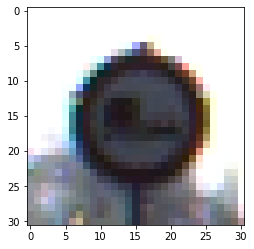

In [10]:
plt.imshow(imgs[0])

Equalizing training data

In [43]:
def randomImage(x_train, labels, label):
    image_indexes = np.where(labels == label)
    random_index = np.random.randint(0, np.bincount(labels)[label] - 1)
    return x_train[image_indexes][random_index]

def equalizeTrainingDataset(x_train, y_train):
    number_of_examples_for_every_label = np.bincount(y_train)
    number_of_labels = np.arange(len(number_of_examples_for_every_label))

    for i in number_of_labels:
        
        number_of_examples_to_add = int(np.mean(number_of_examples_for_every_label) * 2.5) - \
                                                        number_of_examples_for_every_label[i]
        x_temp = []
        y_temp = []

        for j in range(number_of_examples_to_add):
            getting_random_image = randomImage(x_train, y_train, i)
            x_temp.append(getting_random_image)
            y_temp.append(i)

        x_train = np.append(x_train, np.array(x_temp), axis=0)
        y_train = np.append(y_train, np.array(y_temp), axis=0)

    return x_train, y_train

In [69]:
#testImgs, testLabels = equalizeTrainingDataset(imgs, labels)

12630

Saving training data

In [120]:
saver = ModelSaver('data/training-data')
saver.save({'x_train': imgs, 'y_train': labels})

Reloading training data

In [119]:
saver = ModelSaver('training-data')
data = saver.load()
data['y_train'] = data['y_train'].astype('int16')

End of no passing by vehicles over 3.5 metric tons


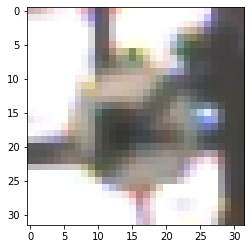

In [74]:
def showTrainImage(n):
    print(preprocessedData['y_train'][labels[n]])
    plt.imshow(imgs[n], cmap=plt.get_cmap('gray_r'))
showTrainImage(97000)

### Load test data

In [11]:
def loadTestImages(rootFolder, csvFile):
    data = loadCSVFile(csvFile)
    images = []
    labels = []
    for i, row in data.iterrows():
        imgPath = row['Path']
        label = row['ClassId']
        img = loadImage(rootFolder + imgPath)
        images.append(img)
        labels.append(label)
    return np.asarray(images), np.asarray(labels)

def loadCSVFile(fileName):
    return pd.read_csv(fileName)[['Path', 'ClassId']]

In [12]:
testImgs, testLabels = loadTestImages("../training-data/", "../training-data/Test.csv")

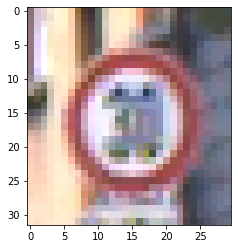

In [14]:
plt.imshow(testImgs[100], cmap=plt.get_cmap('gray_r'))

Saving test data

In [15]:
saver = ModelSaver('data/raw_data')
saver.save({'x_test': testImgs, 'y_test': testLabels, 'x_train': imgs, 'y_train': labels})

Loading test data

In [121]:
saver = ModelSaver('test-data')
data = saver.load()

In [61]:
print(labels[100])
print(preprocessedData['y_train'][labels[100]])
plt.imshow(imgs[100], cmap=plt.get_cmap('gray_r'))

KeyError: 'x_test'

### Load preprocessed training data

In [3]:
preprocessedPath = '../training-data-preprocessed/'

In [29]:
fileName = preprocessedPath + 'data1.pickle'
preprocessedData = pickle.load(open(fileName, 'rb'), encoding='latin1')

In [26]:
def showImage(n):
    img = preprocessedData['x_test'][n]
    img = img.transpose(1, 2, 0)
    low, high = np.min(img), np.max(img)
    img = (img - low) / (high - low)
    #img = img.reshape(32, 32)
    print(preprocessedData['labels'][preprocessedData['y_train'][n]])
    print(preprocessedData['y_train'][n])
    plt.imshow(img.astype('float32'), cmap=plt.get_cmap('gray_r'))

Road narrows on the right
24


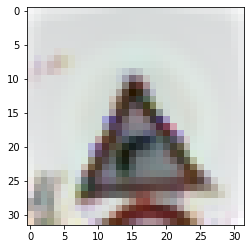

In [27]:
showImage(169)

In [41]:
np.max(preprocessedData['x_test'][0])

1.0

## Preprocess data

In [96]:
def brightness_changing(image):
    image_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    random_brightness = 0.5 + np.random.uniform()
    image_hsv[:, :, 2] = image_hsv[:, :, 2] * random_brightness
    image_rgb = cv2.cvtColor(image_hsv, cv2.COLOR_HSV2RGB)
    return image_rgb

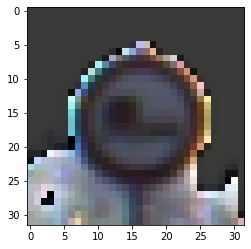